### Preprocessing

In [2]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [3]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Caravan.csv"
Caravan = pd.read_csv(url, index_col = 'Unnamed: 0')
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [8]:
Caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [11]:
Caravan.Purchase = Caravan.Purchase.map({'No': 0, 'Yes': 1})
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [12]:
Caravan.Purchase.value_counts()

0    5474
1     348
Name: Purchase, dtype: int64

### 11.a. Splitting the Caravan data set into training data set and test data set

In [14]:
X = Caravan.drop(columns='Purchase')
y = Caravan.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.82823771899, random_state=42)

In [16]:
len(X_train), len(y_train)

(1000, 1000)

### 11.b. Fiting a boosting model with 1,000 trees and a shrinkage value, $\lambda$=0.01

In [17]:
boost = GradientBoostingRegressor(n_estimators=1000, max_depth=6, learning_rate=0.01).fit(X_train, y_train)

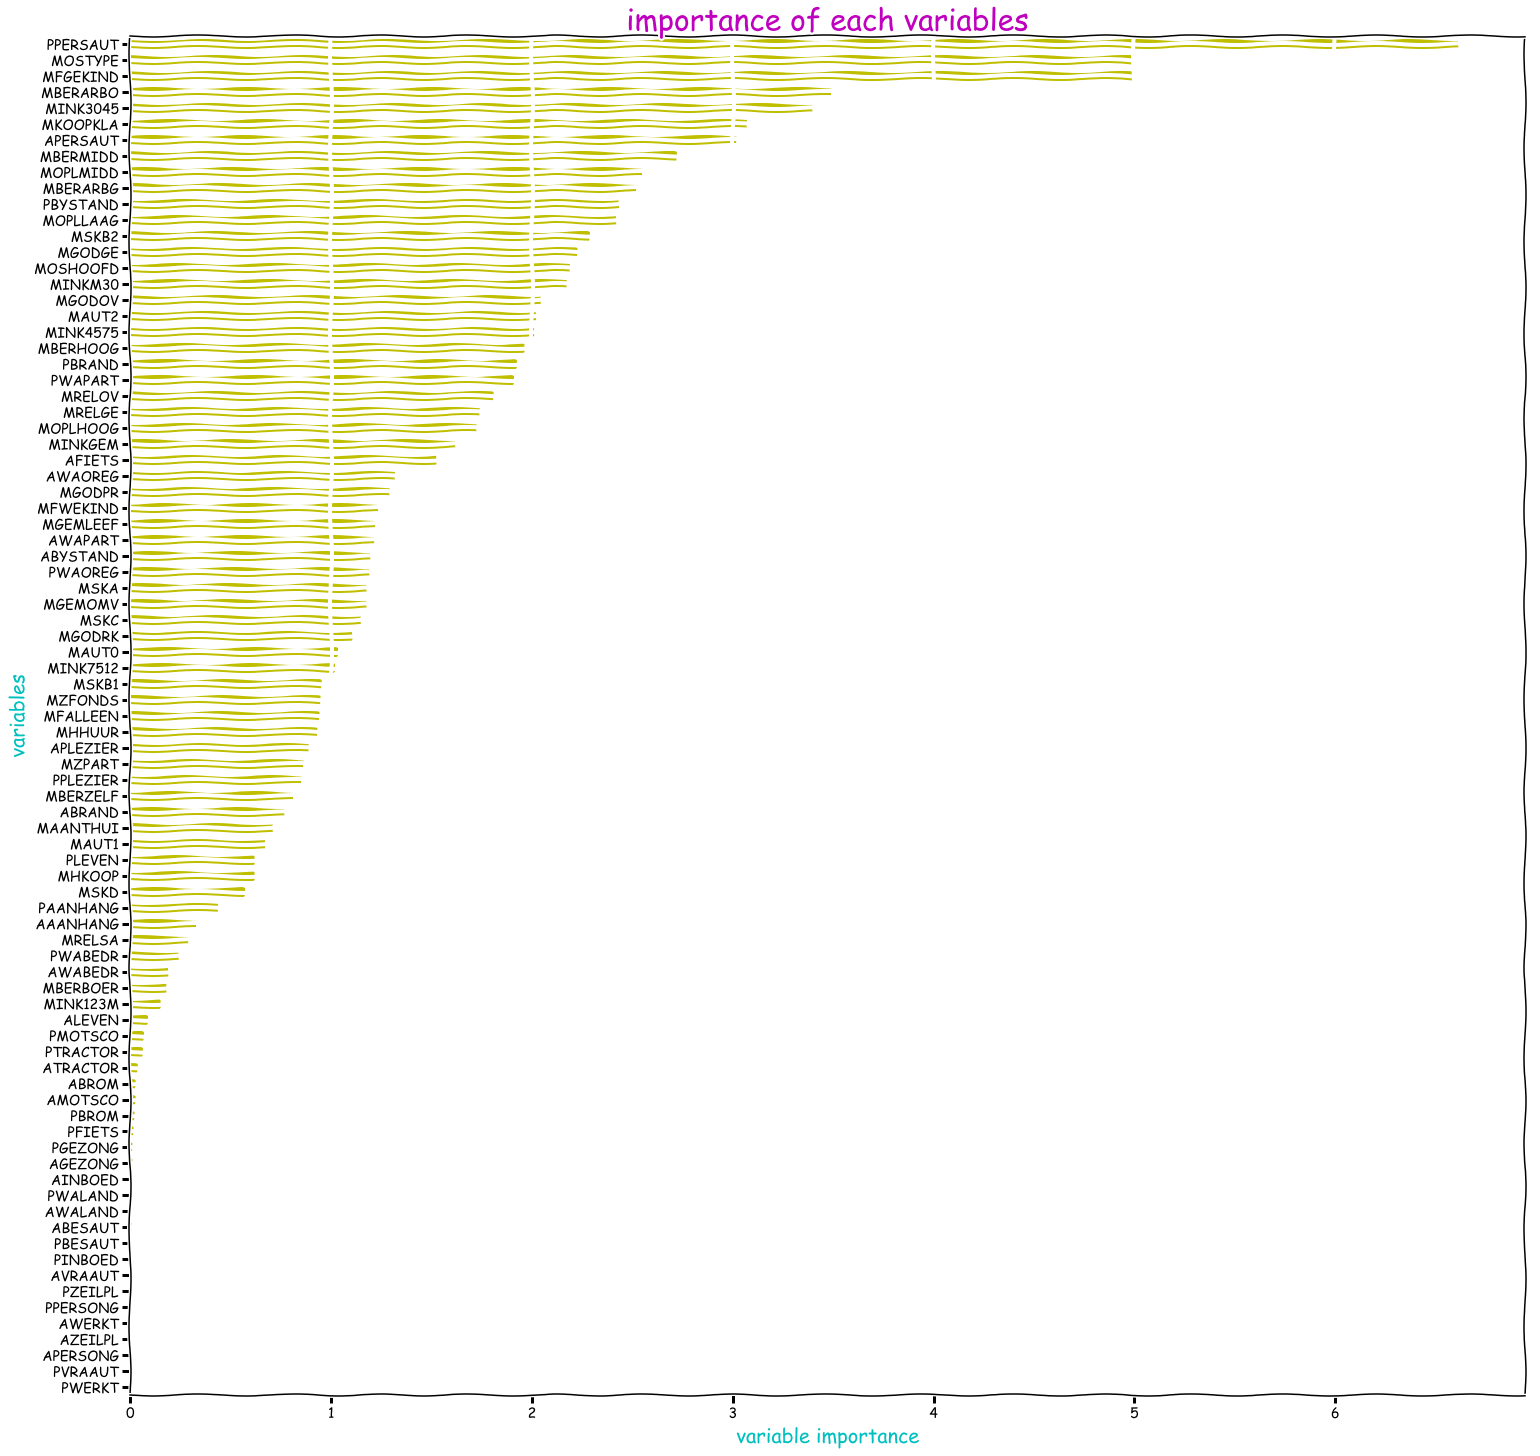

In [21]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'y', figsize=(25, 25), grid= True, )

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None

**'PPERSAUT', 'MOSTYPE', 'MFGEKIND', 'MBERABO' and 'MINK3045' are the most important predictors. The meaning of these variables can be found at: http://bit.ly/2Bb2N2J**

In [23]:
print("Mean Squared Error: ", mean_squared_error(y_test, boost.predict(X_test)))

Mean Squared Error:  0.06772370452325575


In [31]:
boost_pred = pd.DataFrame(boost.predict(X_test))
boost_pred.columns = ['Predictions']
boost_pred.head()

,Predictions
0,0.025871
1,-0.001213
2,0.043009
3,-0.013013
4,0.018759


In [33]:
boost_prob = np.where(boost_pred.Predictions>0.2, 1, 0)
boost_prob

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
class_mat = pd.DataFrame(confusion_matrix(y_test, boost_prob).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4057,217
Yes,477,71


In [39]:
print(classification_report(y_test, boost_prob))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4534
           1       0.13      0.25      0.17       288

   micro avg       0.86      0.86      0.86      4822
   macro avg       0.54      0.57      0.55      4822
weighted avg       0.90      0.86      0.88      4822



**Therefore, it correctly predicts for $\approx$86% of the test data set.**

In [42]:
from sklearn.linear_model import LinearRegression

In [47]:
lmreg = LinearRegression().fit(X_train, y_train)
lmpred = pd.DataFrame(lmreg.predict(X_test))
lmpred.columns = ['Predictions']

In [49]:
lmpred.Predictions = np.where(lmpred.Predictions>0.2, 1, 0)
class_mat = pd.DataFrame(confusion_matrix(y_test, lmpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4290,238
Yes,244,50


In [56]:
print(classification_report(y_test, lmpred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4534
           1       0.17      0.17      0.17       288

   micro avg       0.90      0.90      0.90      4822
   macro avg       0.56      0.56      0.56      4822
weighted avg       0.90      0.90      0.90      4822



**Linear regression provides better results to those of boosting.**

In [51]:
from sklearn.linear_model import LogisticRegression

In [54]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logpred = pd.DataFrame(logreg.predict(X_test))
logpred.columns = ['Predictions']

In [59]:
logpred.Predictions = np.where(logpred.Predictions>0.2, 1, 0)
class_mat = pd.DataFrame(confusion_matrix(y_test, logpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4494,276
Yes,40,12


In [60]:
print(classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4534
           1       0.23      0.04      0.07       288

   micro avg       0.93      0.93      0.93      4822
   macro avg       0.59      0.52      0.52      4822
weighted avg       0.90      0.93      0.91      4822



**Logistic regression provides even better predictions than linear regression and boosting.**